<a target="_blank" href="https://colab.research.google.com/github/mapalmieri/PlatoonWithAttacks/blob/main/Drones_cosimulation_run.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="250" 
     height="80" />
</a>

In [1]:
# Import all dependencies
import json
import subprocess
import pandas
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
%%bash
git clone https://github.com/mapalmieri/PlatoonWithAttacks

fatal: il percorso di destinazione 'PlatoonWithAttacks' esiste già e non è una directory vuota.


CalledProcessError: Command 'b'git clone https://github.com/mapalmieri/PlatoonWithAttacks\n'' returned non-zero exit status 128.

In [7]:
multi_model_json_file = "PlatoonWithAttacks/Multi-models/standardplatooning/mm.json"
with open(multi_model_json_file, 'r') as file :
    multi_model = file.read()

print(json.dumps(json.loads(multi_model), indent=2))

{
  "fmus": {
    "{SimpleCar1}": "Simple_car_01.fmu",
    "{SimpleCar2}": "Simple_car_02.fmu",
    "{SimpleCar3}": "Simple_car_03.fmu",
    "{LeadCar}": "LeadCar.fmu",
    "{Controller1}": "__caccAlg_01.fmu",
    "{Controller2}": "__caccAlg_02.fmu",
    "{Controller3}": "__caccAlg_03.fmu"
  },
  "connections": {
    "{SimpleCar1}.SimpleCar1.speed": [
      "{Controller1}.Controller1.speed_me",
      "{Controller2}.Controller2.speed_prec"
    ],
    "{SimpleCar1}.SimpleCar1.x": [
      "{Controller1}.Controller1.in_x",
      "{Controller2}.Controller2.in_x_prec"
    ],
    "{Controller1}.Controller1.accdes": [
      "{Controller2}.Controller2.acc_prec",
      "{SimpleCar1}.SimpleCar1.accel"
    ],
    "{Controller2}.Controller2.accdes": [
      "{SimpleCar2}.SimpleCar2.accel",
      "{Controller3}.Controller3.acc_prec"
    ],
    "{SimpleCar2}.SimpleCar2.speed": [
      "{Controller2}.Controller2.speed_me",
      "{Controller3}.Controller3.speed_prec"
    ],
    "{SimpleCar2}.SimpleCar

In [8]:
%%capture
%%bash
cd PlatoonWithAttacks
chmod u+x script_launch.sh
./script_launch.sh

In [5]:
data = pandas.read_csv("PlatoonWithAttacks/output.csv")
data

,time,step-size,{Controller1}.Controller1.accdes,{Controller2}.Controller2.accdes,{Controller3}.Controller3.accdes,{LeadCar}.LeadCar.accel,{LeadCar}.LeadCar.speed,{LeadCar}.LeadCar.x,{SimpleCar1}.SimpleCar1.speed,{SimpleCar1}.SimpleCar1.x,{SimpleCar2}.SimpleCar2.speed,{SimpleCar2}.SimpleCar2.x,{SimpleCar3}.SimpleCar3.speed,{SimpleCar3}.SimpleCar3.x
0,0.0,0.0,0.000000,0.000000,0.000000,-0.010000,10.000000,40.000000,5.000000,25.000000,5.000000,15.000000,5.000000,5.000000
1,0.1,0.1,1.830000,0.135000,0.135000,0.027693,9.999000,41.000000,5.000000,25.500000,5.000000,15.500000,5.000000,5.500000
2,0.2,0.1,1.887293,1.068746,0.221246,0.065349,10.001769,41.999900,5.183000,26.000000,5.013500,16.000000,5.013500,6.000000
3,0.3,0.1,1.872852,1.165998,0.705874,0.102930,10.008304,43.000077,5.371729,26.518300,5.120375,16.501350,5.035625,6.501350
4,0.4,0.1,1.856831,1.192768,0.797157,0.140400,10.018597,44.000907,5.559015,27.055473,5.236974,17.013387,5.106212,7.004912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,29.5,0.1,0.185053,0.197971,0.211826,0.177721,17.287400,440.675520,17.410359,421.211218,17.479761,401.753201,17.513003,382.303455
296,29.6,0.1,0.147109,0.159650,0.173303,0.140400,17.305172,442.404260,17.428864,422.952254,17.499558,403.501178,17.534185,384.054755
297,29.7,0.1,0.109004,0.121150,0.134593,0.102930,17.319212,444.134778,17.443575,424.695140,17.515523,405.251133,17.551516,385.808174
298,29.8,0.1,0.070770,0.082512,0.095730,0.065349,17.329505,445.866699,17.454475,426.439498,17.527638,407.002686,17.564975,387.563325


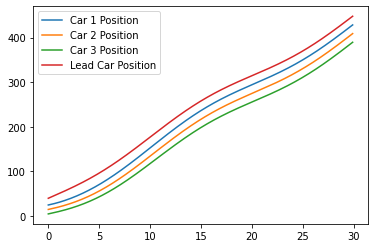

In [9]:
plt.figure()
plt.plot(data["time"], data["{SimpleCar1}.SimpleCar1.x"], label="Car 1 Position")
plt.plot(data["time"], data["{SimpleCar2}.SimpleCar2.x"], label="Car 2 Position")
plt.plot(data["time"], data["{SimpleCar3}.SimpleCar3.x"], label="Car 3 Position")
plt.plot(data["time"], data["{LeadCar}.LeadCar.x"], label="Lead Car Position")
plt.legend()
plt.show()

In [11]:
multi_model_json_file = "PlatoonWithAttacks/Multi-models/xprec_SC_inf/mm.json"
with open(multi_model_json_file, 'r') as file :
    multi_model = file.read()

print(json.dumps(json.loads(multi_model), indent=2))

{
  "fmus": {
    "{SimpleCar1}": "Simple_car_01.fmu",
    "{SimpleCar2}": "Simple_car_02.fmu",
    "{SimpleCar3}": "Simple_car_03.fmu",
    "{LeadCar}": "LeadCar.fmu",
    "{Controller1}": "__caccAlg_01.fmu",
    "{Controller2}": "__caccAlg_02.fmu",
    "{Controller3}": "__caccAlg_03.fmu",
    "{Attack}": "Attack_fmu_inf.fmu"
  },
  "connections": {
    "{SimpleCar1}.SimpleCar1.speed": [
      "{Controller2}.Controller2.speed_prec",
      "{Controller1}.Controller1.speed_me"
    ],
    "{SimpleCar1}.SimpleCar1.x": [
      "{Controller1}.Controller1.in_x",
      "{Attack}.Attack.input"
    ],
    "{Controller2}.Controller2.accdes": [
      "{SimpleCar2}.SimpleCar2.accel",
      "{Controller3}.Controller3.acc_prec"
    ],
    "{Controller1}.Controller1.accdes": [
      "{SimpleCar1}.SimpleCar1.accel",
      "{Controller2}.Controller2.acc_prec"
    ],
    "{Attack}.Attack.output": [
      "{Controller2}.Controller2.in_x_prec"
    ],
    "{SimpleCar2}.SimpleCar2.speed": [
      "{Controll

In [14]:
%%capture
%%bash
cd PlatoonWithAttacks
chmod u+x script_launch_attack.sh
./script_launch_attack.sh

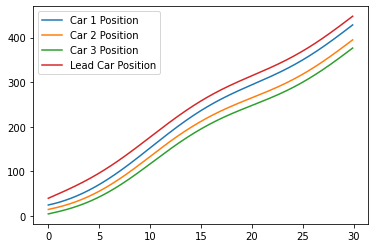

In [13]:
data = pandas.read_csv("PlatoonWithAttacks/output.csv")
plt.figure()
plt.plot(data["time"], data["{SimpleCar1}.SimpleCar1.x"], label="Car 1 Position")
plt.plot(data["time"], data["{SimpleCar2}.SimpleCar2.x"], label="Car 2 Position")
plt.plot(data["time"], data["{SimpleCar3}.SimpleCar3.x"], label="Car 3 Position")
plt.plot(data["time"], data["{LeadCar}.LeadCar.x"], label="Lead Car Position")
plt.legend()
plt.show()